<a href="https://colab.research.google.com/github/RITTEAM100/polistack/blob/main/olw4196_Odin_Liam_Wright_DSCI_633_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Data Exploration and Visualization

In [108]:
# IMPORTING GENERAL LIBRARIES
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math
import json

In [109]:
# TASK 1.1a - LOAD DATASET
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

In [110]:
# TASK 1.1b - PROBLEM STATEMENT
## To Develop a Machine Learning Model for facial recognition using the “labeled faces in the wild (lfw_people) dataset”

In [111]:
# TASK 1.2 - SPLIT DATA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = people.data
y = people.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [112]:
# TASK 1.3 - CONDUCT EDA (EXPLORATORY DATA ANALYSIS)
## i.e. data distribution, handling missing values, feature correlations.
target_names = people.target_names
n_samples, h, w = people.images.shape
n_features = X.shape[1]
n_classes = target_names.shape[0]

print(f"n_samples: {n_samples}")
print(f"\nn_features: {n_features}")
print(f"\nn_classes: {n_classes}, target_names: {target_names}")

# TASK 1.3 - DATA DISTRIBUTION
n_samples_per_class = np.bincount(y)
print(f"\n# TASK 1.3 - DATA DISTRIBUTION: {n_samples_per_class}")

# add people to dataframe
df = pd.DataFrame(people.data)
df['target'] = people.target
print(df.head())

n_samples: 1288

n_features: 1850

n_classes: 7, target_names: ['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']

# TASK 1.3 - DATA DISTRIBUTION: [ 77 236 121 530 109  71 144]
          0         1         2         3         4         5         6  \
0  0.997386  0.996078  0.992157  0.966013  0.758170  0.569935  0.700654   
1  0.147712  0.197386  0.175163  0.192157  0.385621  0.473203  0.543791   
2  0.343791  0.394771  0.491503  0.555556  0.597386  0.611765  0.606536   
3  0.047059  0.016993  0.023529  0.016993  0.031373  0.230065  0.677124   
4  0.471895  0.458824  0.486275  0.499346  0.494118  0.513726  0.545098   

          7         8         9  ...      1841      1842      1843      1844  \
0  0.794771  0.784314  0.767320  ...  0.426144  0.422222  0.415686  0.401307   
1  0.615686  0.671895  0.694118  ...  0.239216  0.296732  0.307190  0.325490   
2  0.626144  0.640523  0.652288  ...  0.430065  0.379085  0.410458  0

In [113]:
# all features are 0 - .9 and don't need scaling
print(df.describe())

                 0            1            2            3            4  \
count  1288.000000  1288.000000  1288.000000  1288.000000  1288.000000   
mean      0.355769     0.374626     0.412965     0.462963     0.507093   
std       0.180138     0.174567     0.169204     0.165087     0.159878   
min       0.000000     0.001307     0.001307     0.003922     0.005229   
25%       0.227124     0.252288     0.299020     0.359477     0.409150   
50%       0.339216     0.369935     0.415033     0.461438     0.509804   
75%       0.474510     0.486275     0.524183     0.574183     0.613072   
max       0.997386     0.996078     0.992157     0.968627     0.959477   

                 5            6            7            8            9  ...  \
count  1288.000000  1288.000000  1288.000000  1288.000000  1288.000000  ...   
mean      0.541963     0.567585     0.587089     0.605063     0.621473  ...   
std       0.148425     0.142111     0.138726     0.135052     0.130857  ...   
min       0.00915

In [114]:
# TASK 1.4 - PERFORM DATA PREPROCESSING IF NECESSARY
## i.e. handling missing values and encoding categorical features if necessary
## no missing values
## no encoding required

## 2. Feature Engineering and Visualization

class distributions suggest a bias towards identifying 'George W Bush'


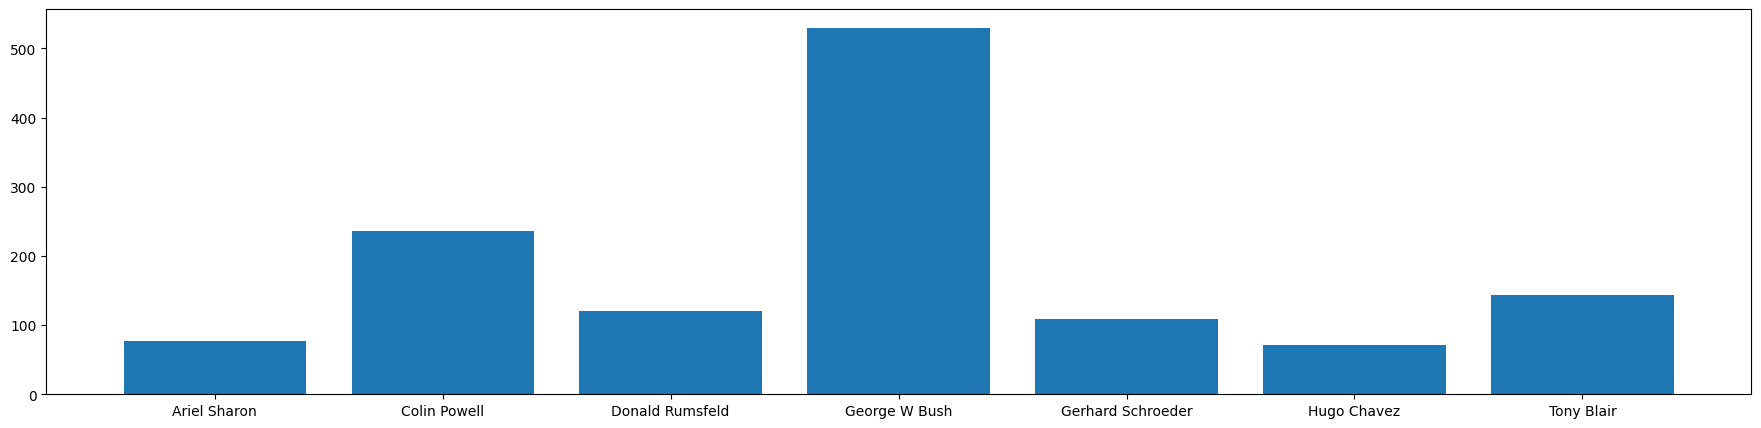

In [115]:
# TASK 2.1 - GENERATE INFORMATIVE VISUALIZATIONS
print("class distributions suggest a bias towards identifying 'George W Bush'")
plt.figure(figsize=(22,5))
plt.bar(range(n_classes), n_samples_per_class)
plt.xticks(range(n_classes), target_names)
plt.show()

In [116]:
# TASK 2.2 - PERFORM FEATURE ENGINEERING {Transformation, scaling, normalization, or other...}
## performing standard scaler on features.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 3. Model Building and Regularization

In [117]:
# TASK 3.A - IMPLEMENT GRADIENT DESCENT FOR OPTIMIZATION
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss='log_loss', learning_rate='constant', eta0=0.01, max_iter=1000)
clf.fit(X_train_scaled, y_train)
print(f"Optimized Model Coefficients:\n {clf.coef_}")

Optimized Model Coefficients:
 [[ 3.70287897e-01  3.43063258e-01  2.35111580e-01 ... -1.59227281e-02
   1.95160917e-02  1.18015409e-01]
 [ 2.76648957e-01  9.01294880e-02  9.65892619e-02 ... -3.65695531e-02
  -1.72924249e-01 -8.91987709e-02]
 [ 4.34679916e-02 -2.11297945e-01 -1.64668953e-01 ... -9.75173814e-02
  -9.84765177e-02 -1.89932160e-01]
 ...
 [-2.48289895e-01 -1.33125203e-01  6.01574866e-02 ...  2.77814798e-02
   5.14568468e-02 -1.39233444e-01]
 [ 2.33655533e-02 -6.72731691e-05  2.14003720e-02 ...  7.86826326e-02
  -4.39574687e-02  5.02592173e-02]
 [-3.87589024e-02 -3.41458954e-02 -1.75441385e-01 ...  1.16494645e-01
  -7.03247534e-03  1.66701372e-01]]


In [118]:
from sklearn.model_selection import StratifiedKFold, cross_val_predict, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, confusion_matrix
import time

# RECORDING MODEL PERFORMANCE
model_performance = {}
def calculate_metrics(model_name, clf, use_pca, use_kfold):
    start_time = time.time() # start time
    print(f"Started \"{model_name}\" model...", end='')

    # CHECK IF MODEL IS USING PCA
    if use_pca == True:
      clf.fit(X_train_pca, y_train)
      y_pred = clf.predict(X_test_pca)
    else:
      clf.fit(X_train_scaled, y_train)
      y_pred = clf.predict(X_test)

    avg = 'macro'

    cm = confusion_matrix(y_test, y_pred) #.flatten().tolist()
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average=avg, zero_division=0)
    recall = recall_score(y_test, y_pred, average=avg)
    f1 = f1_score(y_test, y_pred, average=avg)

    # TEST WITH K-FOLDS
    if use_kfold == True:
      accuracy_kfold = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    else:
      accuracy_kfold = 0
    #precision_kfold = cross_val_score(clf, X, y, cv=5, scoring='precision')
    #recall_kfold = cross_val_score(clf, X, y, cv=5, scoring='recall', average=avg)
    #f1_kfold = cross_val_score(clf, X, y, cv=5, scoring='f1', average=avg)

    end_time = time.time()  # End time
    elapsed_time = round(end_time - start_time,3)  # Time taken to train and predict

    if use_kfold == True:
      akfm = round(accuracy_kfold.mean(), 3)
      accuracy_kfold_performance_ratio = akfm / elapsed_time
      accuracy_confidence = round(1.96 * math.sqrt((akfm * (1 - akfm)) / n_samples),4)

    else:
      accuracy_confidence = round(1.96 * math.sqrt((accuracy * (1 - accuracy)) / n_samples),4)
      performance_ratio = accuracy / elapsed_time

    if use_kfold == True:
      model_performance[model_name] = {
            'accuracy': round(accuracy,3),
            'accuracy_kfold': round(accuracy_kfold.mean(), 3),
            'precision': round(precision, 3),
            'recall': round(recall,3),
            'f1': round(f1,3),
            'cm': cm,
            'elapsed_time': elapsed_time,
            'performance_ratio': round(accuracy_kfold_performance_ratio, 3),
            'accuracy_confidence': accuracy_confidence
        }
      print(f" DONE... {elapsed_time} seconds. Accuracy: {round(accuracy, 3)}, Accuracy_K-Fold: {accuracy_kfold}")

    else:
      model_performance[model_name] = {
            'accuracy': round(accuracy,3),
            'accuracy_kfold': 0,
            'precision': round(precision, 3),
            'recall': round(recall,3),
            'f1': round(f1,3),
            'cm': cm,
            'elapsed_time': elapsed_time,
            'performance_ratio': round(performance_ratio,3),
            'accuracy_confidence': accuracy_confidence
        }
      print(f" DONE... {elapsed_time} seconds. Accuracy: {round(accuracy, 3)}")


In [119]:
# TASK 3.B.1 - IMPLEMENT LOGISTIC REGRESSION
## NOTICE: THIS IS WITHOUT PCA
from sklearn.linear_model import LogisticRegression
logistic_params = {
    'C': 1.0,
    'solver': 'liblinear',
    'penalty': 'l2'
}
clf = LogisticRegression(max_iter=2000, **logistic_params)
calculate_metrics('Logistic Regression', clf, False, True)

# TASK 3.B.2 - IMPLEMENT SVM
from sklearn.svm import SVC
svm_params = {
    'C': 1.0,
    'kernel': 'rbf',
    'gamma': 'scale'
}
clf = SVC(**svm_params)
calculate_metrics('SVM', clf, False, True)



# TASK 3.C.1 - CONSTRUCT VARIOUS MODELS {SVM, Decision Trees, Random Forest, etc.}
# TASK 3.C.2 - Apply model regularization techniques {learning rates, regularization parameters, etc.}
# DECISION TREE
from sklearn.tree import DecisionTreeClassifier
decision_tree_params = {
    'criterion': 'gini',
    'max_depth': None,
    'min_samples_split': 2
}
clf = DecisionTreeClassifier(**decision_tree_params)
calculate_metrics('Decision Tree', clf, False, True)

# RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
random_forest_params = {
    'n_estimators': 100,
    'random_state': 42
}
clf = RandomForestClassifier(**random_forest_params)
calculate_metrics('Random Forest', clf, False, True)

# RANDOMIZED SEARCH CV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform
param_grid_rand = {
    "C": loguniform(1e3, 1e5),
    "gamma": loguniform(1e-4, 1e-1),
}
clf = RandomizedSearchCV(SVC(kernel="rbf", class_weight="balanced"), param_grid_rand, n_iter=2, random_state=2)
calculate_metrics('Randomized Search CV', clf, False, True)

# PRINT DICTIONARY OF MODEL PERFORMANCE
print(f"\nMODEL PERFORMANCE: \n{model_performance}")

Started "Logistic Regression" model... DONE... 39.077 seconds. Accuracy: 0.554, Accuracy_K-Fold: [0.86046512 0.8255814  0.85271318 0.82101167 0.82490272]
Started "SVM" model... DONE... 8.379 seconds. Accuracy: 0.504, Accuracy_K-Fold: [0.74806202 0.76356589 0.71317829 0.74319066 0.77821012]
Started "Decision Tree" model... DONE... 10.022 seconds. Accuracy: 0.45, Accuracy_K-Fold: [0.44573643 0.45736434 0.4379845  0.44747082 0.46303502]
Started "Random Forest" model... DONE... 19.031 seconds. Accuracy: 0.461, Accuracy_K-Fold: [0.64341085 0.62403101 0.59302326 0.6381323  0.66536965]
Started "Randomized Search CV" model... DONE... 47.354 seconds. Accuracy: 0.481, Accuracy_K-Fold: [0.85271318 0.8372093  0.82170543 0.85603113 0.83268482]

MODEL PERFORMANCE: 
{'Logistic Regression': {'accuracy': 0.554, 'accuracy_kfold': 0.837, 'precision': 0.599, 'recall': 0.258, 'f1': 0.275, 'cm': array([[  0,   0,   0,  11,   0,   0,   0],
       [  0,  10,   0,  37,   0,   0,   0],
       [  0,   0,   2,  2

In [120]:
# GRID SEARCH CV
from sklearn.model_selection import GridSearchCV
param_grid = {}
clf = GridSearchCV(SVC(kernel="rbf", class_weight="balanced"), param_grid)
calculate_metrics('Grid Search CV', clf, False, True)

Started "Grid Search CV" model... DONE... 43.673 seconds. Accuracy: 0.182, Accuracy_K-Fold: [0.77906977 0.81007752 0.76356589 0.78210117 0.79377432]


## 4. Dimensionality Reduction, Performance Measurement, and Model Evaluation

In [121]:
# RUNNING RANDOMIZED SEARCH CV... AGAIN
## CHANGING SEED HYPERPARAMETERS FOR TESTING...
for i in range(1, 3):
    clf = RandomizedSearchCV(SVC(kernel="rbf", class_weight="balanced"), param_grid_rand, n_iter=4, random_state=i)
    calculate_metrics(f"Randomized Search CV - {i}", clf, False, False)

Started "Randomized Search CV - 1" model... DONE... 23.748 seconds. Accuracy: 0.484
Started "Randomized Search CV - 2" model... DONE... 23.768 seconds. Accuracy: 0.481


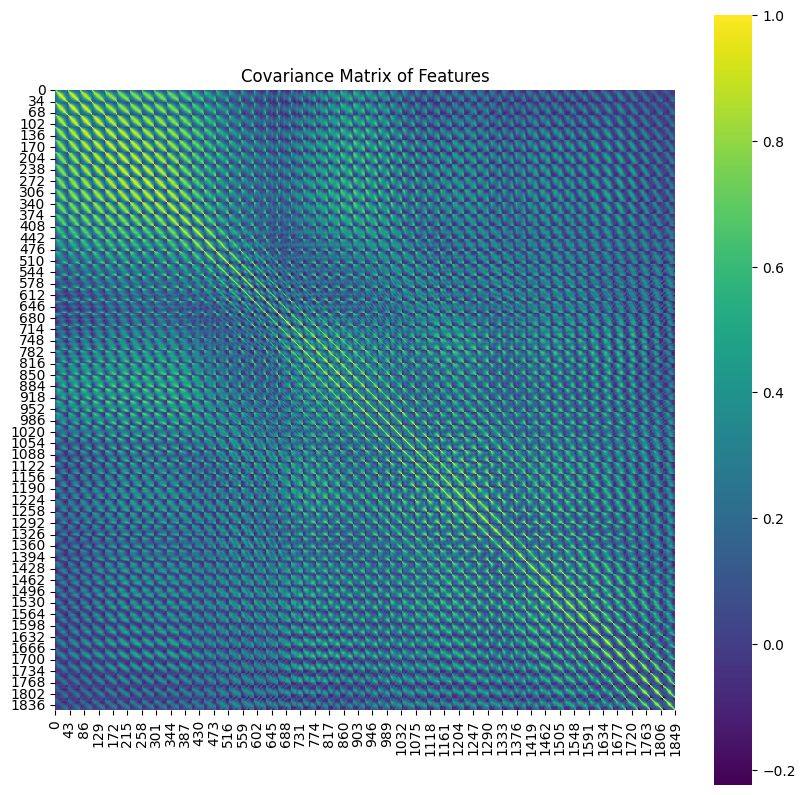

In [122]:
# VISUALIZE THE COVARIANCE MATRIX WITHOUT PCA
cov_matrix = np.cov(X_train_scaled.T)
plt.figure(figsize=(10, 10))
sns.heatmap(cov_matrix, vmax=1, square=True, cmap='viridis')
plt.title('Covariance Matrix of Features')
plt.show()

Eigenvalues:
[478.74743525 269.28848121 126.88843986  90.86348441  59.55151699
  49.29465528  36.41234288  32.23889866  30.3691558   27.93831637]

RED DOT: Only a Few features are needed as the Eigenvalues drop off quickly after ~30 components.


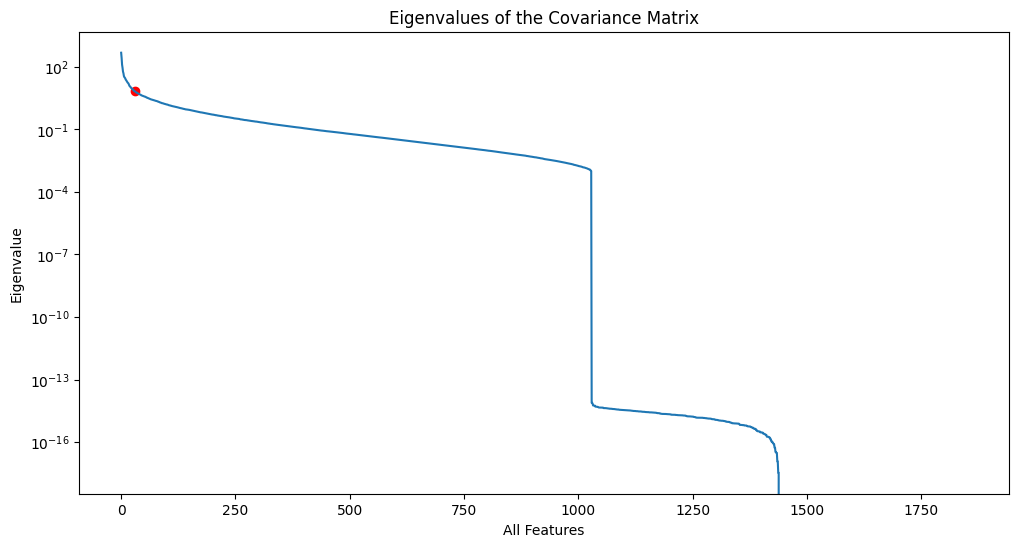

In [123]:
# RENDER EXAMPLE OF EIGENVALUES
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Converting to Real Numbers
eigenvalues = np.real(eigenvalues)
eigenvectors = np.real(eigenvectors)

# Sorting the Eigenvalues and Eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[sorted_indices]
eigenvectors_sorted = eigenvectors[:,sorted_indices]

# Printing a few Eigenvalues to see their magnitudes
print("Eigenvalues:")
print(eigenvalues_sorted[:10])

# Visualizing the Magnitude of Eigenvalues
plt.figure(figsize=(12, 6))
plt.plot(eigenvalues_sorted)
plt.title('Eigenvalues of the Covariance Matrix')
plt.xlabel('All Features')
plt.ylabel('Eigenvalue')
plt.yscale('log') # Using logarithmic scale for better visibility
plt.scatter(30, eigenvalues_sorted[30], color='red')  # Red dot at x=30
print("\nRED DOT: Only a Few features are needed as the Eigenvalues drop off quickly after ~30 components.")
plt.show()

Reduction of Dimensions to Fewer Components, showing CoVariance:


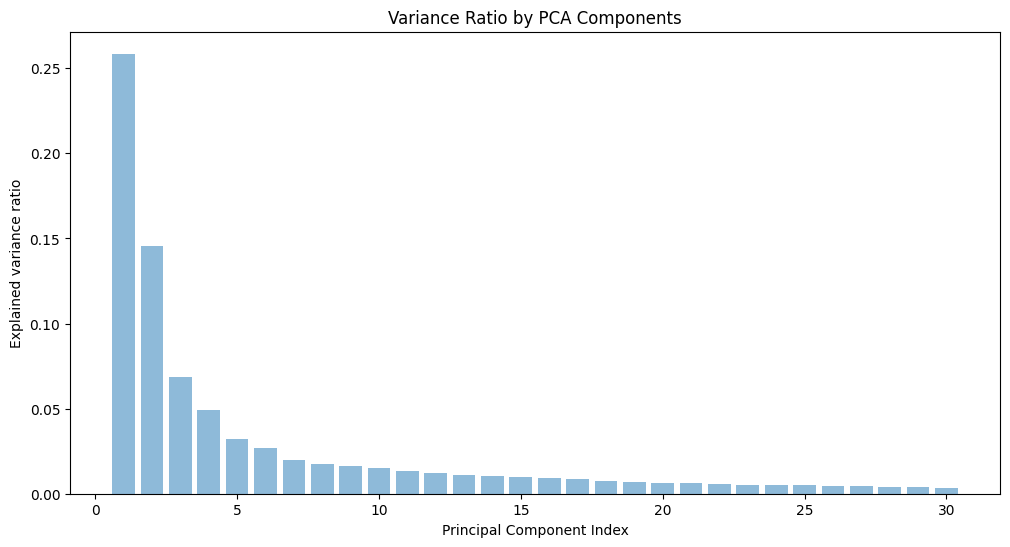

In [124]:
# TASK 4.1 - EMPLOY DIMENSIONALITY REDUCTION TECHNIQUES SUCH AS PCA
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensionality.
n_components=30
pca = PCA(n_components)
X_pca = pca.fit_transform(X_train_scaled)

X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Calculate the variance of each feature
feature_variances = np.var(X_train_scaled, axis=0)

# CoVariance after PCA
print('Reduction of Dimensions to Fewer Components, showing CoVariance:')
plt.figure(figsize=(12, 6))
plt.bar(range(1, n_components+1), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal Component Index')
plt.title('Variance Ratio by PCA Components')
plt.show()


Example of 2 Components:


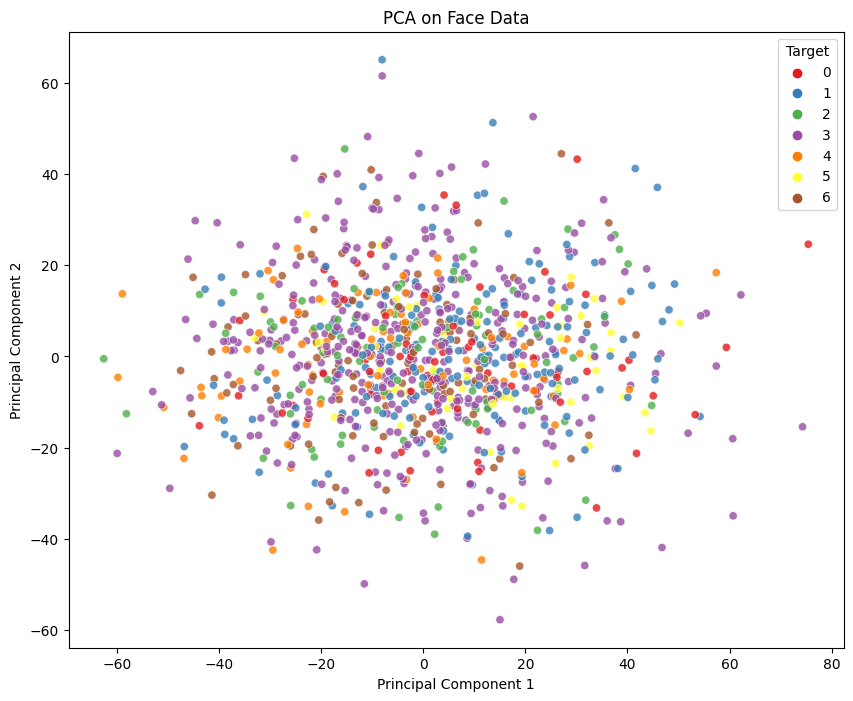

In [125]:
# Reapplying PCA with 2 components as a test.
print('\nExample of 2 Components:')
pca2 = PCA(n_components=2)
X_pca2= pca2.fit_transform(X_train_scaled)
pca_df = pd.DataFrame(data=X_pca2, columns=['PC1', 'PC2'])
pca_df['Target'] = y_train
plt.figure(figsize=(10, 8))
sns.scatterplot(x="PC1", y="PC2", hue="Target", data=pca_df, palette="Set1", alpha=0.8)
plt.title('PCA on Face Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [126]:
# IMPLEMENT WITH PCA
clf = LogisticRegression(max_iter=2000, **logistic_params)
calculate_metrics('PCA - Logistic Regression', clf, True, True)

clf = SVC(**svm_params)
calculate_metrics('PCA - SVM', clf, True, True)

clf = DecisionTreeClassifier(**decision_tree_params)
calculate_metrics('PCA - Decision Tree', clf, True, True)

clf = RandomForestClassifier(**random_forest_params)
calculate_metrics('PCA - Random Forest', clf, True, True)

clf = RandomizedSearchCV(SVC(kernel="rbf", class_weight="balanced"), param_grid_rand, n_iter=2, random_state=2)
calculate_metrics('PCA - Randomized Search CV', clf, True, True)

clf = GridSearchCV(SVC(kernel="rbf", class_weight="balanced"), param_grid)
calculate_metrics('PCA - Grid Search CV', clf, True, True)

Started "PCA - Logistic Regression" model... DONE... 20.259 seconds. Accuracy: 0.771, Accuracy_K-Fold: [0.86046512 0.8255814  0.85271318 0.82101167 0.82490272]
Started "PCA - SVM" model... DONE... 6.429 seconds. Accuracy: 0.748, Accuracy_K-Fold: [0.74806202 0.76356589 0.71317829 0.74319066 0.77821012]
Started "PCA - Decision Tree" model... DONE... 9.327 seconds. Accuracy: 0.5, Accuracy_K-Fold: [0.39922481 0.49612403 0.43023256 0.45525292 0.47081712]
Started "PCA - Random Forest" model... DONE... 15.966 seconds. Accuracy: 0.721, Accuracy_K-Fold: [0.64341085 0.62403101 0.59302326 0.6381323  0.66536965]
Started "PCA - Randomized Search CV" model... DONE... 36.78 seconds. Accuracy: 0.736, Accuracy_K-Fold: [0.85271318 0.8372093  0.82170543 0.85603113 0.83268482]
Started "PCA - Grid Search CV" model... DONE... 34.627 seconds. Accuracy: 0.698, Accuracy_K-Fold: [0.77906977 0.81007752 0.76356589 0.78210117 0.79377432]


In [127]:
# ENSEMBLE METHOD - BOOSTING
from sklearn.ensemble import GradientBoostingClassifier

gb_params = {'n_estimators': 100, 'learning_rate': 0.2, 'max_depth': 3, 'random_state': 42}
clf = GradientBoostingClassifier(**gb_params)
calculate_metrics('PCA - Gradient Boosting', clf, True, False)

Started "PCA - Gradient Boosting" model... DONE... 9.106 seconds. Accuracy: 0.76


In [128]:
# ATTEMPTING SMOTE
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from collections import Counter

print(f"Original dataset shape {Counter(y)}")

# SETTING MINORITY OVERSAMPLING BY 20%
target_size = int(0.2 * max(Counter(y).values()))
sampling_strategy = {class_label: target_size for class_label, count in Counter(y).items() if count < target_size}
sm = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
X, y = sm.fit_resample(X, y)

print(f"Resampled dataset shape {Counter(y)}")
clf = RandomizedSearchCV(SVC(kernel="rbf", class_weight="balanced"), param_grid_rand, n_iter=2, random_state=2)
calculate_metrics('SMOTE + PCA - Randomized Search CV', clf, True, True)

Original dataset shape Counter({3: 530, 1: 236, 6: 144, 2: 121, 4: 109, 0: 77, 5: 71})
Resampled dataset shape Counter({3: 530, 1: 236, 6: 144, 2: 121, 4: 109, 5: 106, 0: 106})
Started "SMOTE + PCA - Randomized Search CV" model... DONE... 38.58 seconds. Accuracy: 0.736, Accuracy_K-Fold: [0.86715867 0.86346863 0.83333333 0.87407407 0.86666667]


In [129]:
######
# PRINT EVERYTHING OUT IN A PRETTY TABLE
######
from prettytable import PrettyTable

# FUNCTIONS TO CALCULATE CONFUSION MATRIX
def calculate_confusion_matrix_metrics(cm):
    tp = np.diag(cm)
    fp = np.sum(cm, axis=0) - tp
    fn = np.sum(cm, axis=1) - tp
    tn = np.sum(cm) - (fp + fn + tp)
    sensitivity = sum(tp) / (sum(tp) + sum(fn))
    specificity = sum(tn) / (sum(tn) + sum(fp))
    positive_precision = sum(fp) / (sum(tp) + sum(fp))
    negative_precision = sum(fn) / (sum(tn) + sum(fn))
    error_rate = 1 - (positive_precision + negative_precision)
    return tp, fp, fn, tn, sensitivity, specificity, positive_precision, negative_precision, error_rate

def update_model_performance_with_metrics(model_performance):
    for model, metrics in model_performance.items():
        cm = metrics['cm']
        tp, fp, fn, tn, sensitivity, specificity, positive_precision, negative_precision, error_rate = calculate_confusion_matrix_metrics(cm)
        metrics['tp'] = sum(tp.tolist())
        metrics['fp'] = sum(fp.tolist())
        metrics['fn'] = sum(fn.tolist())
        metrics['tn'] = sum(tn.tolist())
        metrics['sensitivity'] = round(sensitivity,3)
        metrics['specificity'] = round(specificity,3)
        metrics['positive_precision'] = round(positive_precision,3)
        metrics['negative_precision'] = round(negative_precision,3)
        metrics['error_rate'] = round(error_rate,3)
        metrics['accuracy_confidence'] = round(1.96 * math.sqrt(metrics['accuracy']  * (1 - metrics['accuracy']) / n_samples),3)

update_model_performance_with_metrics(model_performance)
# print(model_performance)

# GENERATE PRETTY TABLE
sorted_models = sorted(model_performance.items(), key=lambda x: x[1]['f1'], reverse=True)
table = PrettyTable()
table.field_names = ["Model", "Accuracy", "Acc. K-Fold", "Confidence", "Time", "Ratio", "Precision", "Recall", "F1", "TP", "FP", "FN", "TN", "Sens.", "Spec.", "+ Prec.", "- Prec.", "Error"]
for model, metrics in sorted_models:
    table.add_row([model,
                   "{:.1%}".format(metrics['accuracy']), "{:.1%}".format(metrics['accuracy_kfold']), "+/- {:.1%}".format(metrics['accuracy_confidence']), f"{round(metrics['elapsed_time'])}s",
                   "{:.1%}".format(metrics['performance_ratio']), metrics['precision'], metrics['recall'], metrics['f1'], metrics['tp'], metrics['fp'], metrics['fn'], metrics['tn'],
                   metrics['sensitivity'], metrics['specificity'], metrics['positive_precision'], metrics['negative_precision'], metrics['error_rate']])

# PRINT FULL PERFORMANCE TABLE
print(f"Printing Model Performance Table (Sorted by Performance Ratio):\n{table}")
best_model = sorted_models[0][0]  # First model in the sorted list
best_score = model_performance[best_model]['f1']
# print(f"The model with the highest performance score is \"{best_model}\" with a performance ratio of {best_score:.3f}.")

Printing Model Performance Table (Sorted by Performance Ratio):
+------------------------------------+----------+-------------+------------+------+-------+-----------+--------+-------+-----+-----+-----+------+-------+-------+---------+---------+-------+
|               Model                | Accuracy | Acc. K-Fold | Confidence | Time | Ratio | Precision | Recall |   F1  |  TP |  FP |  FN |  TN  | Sens. | Spec. | + Prec. | - Prec. | Error |
+------------------------------------+----------+-------------+------------+------+-------+-----------+--------+-------+-----+-----+-----+------+-------+-------+---------+---------+-------+
|     PCA - Logistic Regression      |  77.1%   |    83.7%    |  +/- 2.3%  | 20s  |  4.1% |   0.706   | 0.654  | 0.665 | 199 |  59 |  59 | 1489 | 0.771 | 0.962 |  0.229  |  0.038  | 0.733 |
|      PCA - Gradient Boosting       |  76.0%   |     0.0%    |  +/- 2.3%  |  9s  |  8.3% |   0.685   | 0.625  | 0.645 | 196 |  62 |  62 | 1486 |  0.76 |  0.96 |   0.24  |   0.